## Create a new Python environment

In [ ]:
### Install a virtual environment
# Option 1:  using conda (recommended)
!conda create -n venv_lips python=3.10
!conda activate venv_lips

# Option 2: using virtualenv
!pip install virtualenv
!virtualenv -p /usr/bin/python3.10 venv_lips
!source venv_lips/bin/activate

### Install the LIPS framework
# Option 1: Get the last version of LIPS framework from PyPI (Recommended)
!pip install 'lips-benchmark[recommended]'

# Option 2: Get the last version from github repository
!git clone https://github.com/IRT-SystemX/LIPS.git
!pip install -U LIPS/.[recommended]


## Download experimental data

In [ ]:
import os
from lips.benchmark.powergridBenchmark import PowerGridBenchmark
from lips.dataset.powergridDataSet import downloadPowergridDataset
os.chdir("ml4physim_startingkit_powergrid")
BENCH_CONFIG_PATH = os.path.join("configs", "benchmarks", "lips_idf_2023.ini")
DATA_PATH = os.path.join("input_data_local", "lips_idf_2023")
LOG_PATH = "lips_log.log"

In [ ]:
downloadPowergridDataset("input_data_local", "lips_idf_2023")

## Check the integrity of the data

In [ ]:
benchmark = PowerGridBenchmark(benchmark_path=DATA_PATH,
                               config_path=BENCH_CONFIG_PATH,
                               benchmark_name="Benchmark_competition",
                               load_data_set=True, # to load already generated dataset
                               load_ybus_as_sparse=True, # Ybus is registered as sparse
                               log_path=LOG_PATH)

In [ ]:
print(benchmark.train_dataset.size)
print(benchmark.val_dataset.size)
print(benchmark._test_dataset.size)
print(benchmark._test_ood_topo_dataset.size)

300000
100000
100000
200000


In [ ]:
benchmark.train_dataset.data.keys()

dict_keys(['prod_p', 'prod_v', 'load_p', 'load_q', 'line_status', 'topo_vect', 'a_or', 'a_ex', 'p_or', 'p_ex', 'v_or', 'v_ex', 'theta_or', 'theta_ex', 'YBus', 'SBus', 'PV_nodes', 'slack'])

In [ ]:
data_categories = ["attr_x", "attr_y", "attr_tau", "attr_physics"]
for category in data_categories:
    print(category, ": ", benchmark.config.get_option(category))

attr_x :  ('prod_p', 'prod_v', 'load_p', 'load_q')
attr_y :  ('a_or', 'a_ex', 'p_or', 'p_ex', 'v_or', 'v_ex', 'theta_or', 'theta_ex')
attr_tau :  ('line_status', 'topo_vect')
attr_physics :  ('YBus', 'SBus', 'PV_nodes', 'slack')


## Data visualization

In [ ]:
from lips.plot.power_grid import PlotData
obs_plotter = PlotData(dataset=benchmark._test_dataset, env_name=benchmark.env_name)

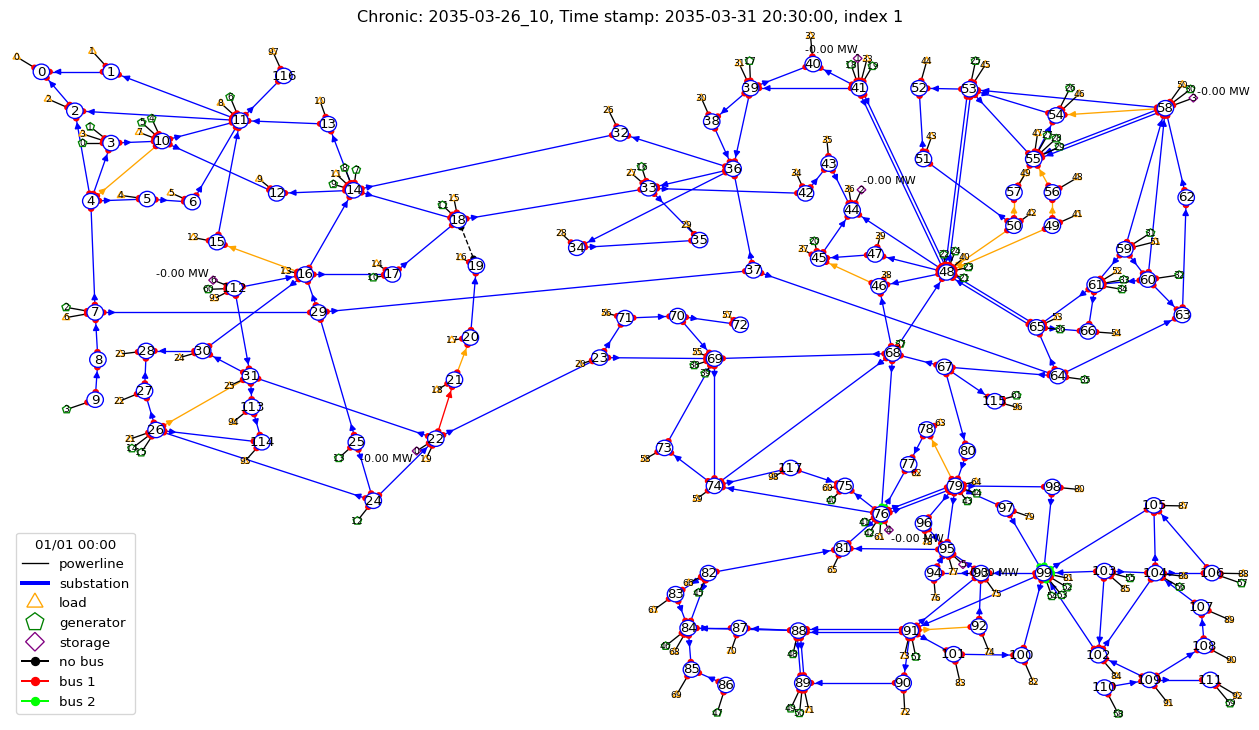

In [ ]:
# visualize the next network topology of test dataset
obs_plotter.visualize_next()

In [ ]:
from lips.plot.power_grid import PlotData
obs_plotter = PlotData(dataset=benchmark._test_ood_topo_dataset, env_name=benchmark.env_name)

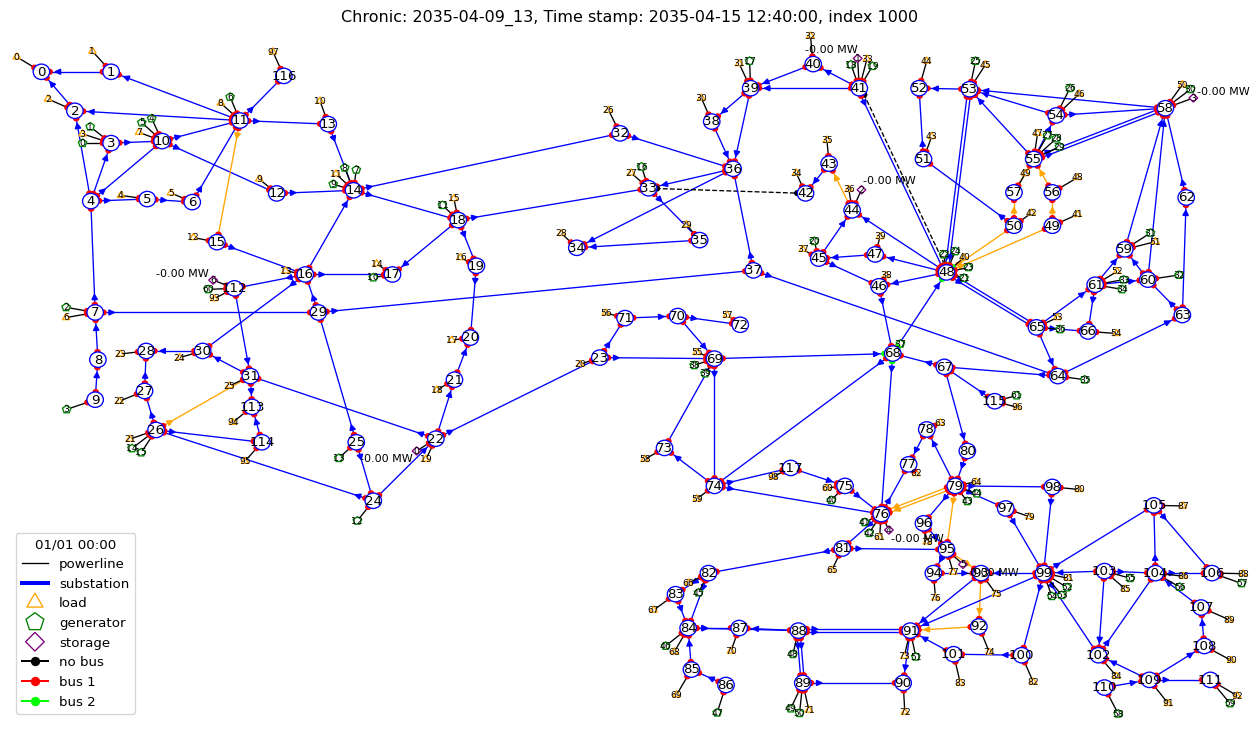

In [ ]:
# visualize the next network topology of test dataset
obs_plotter.visualize_obs(id_obs=1000)

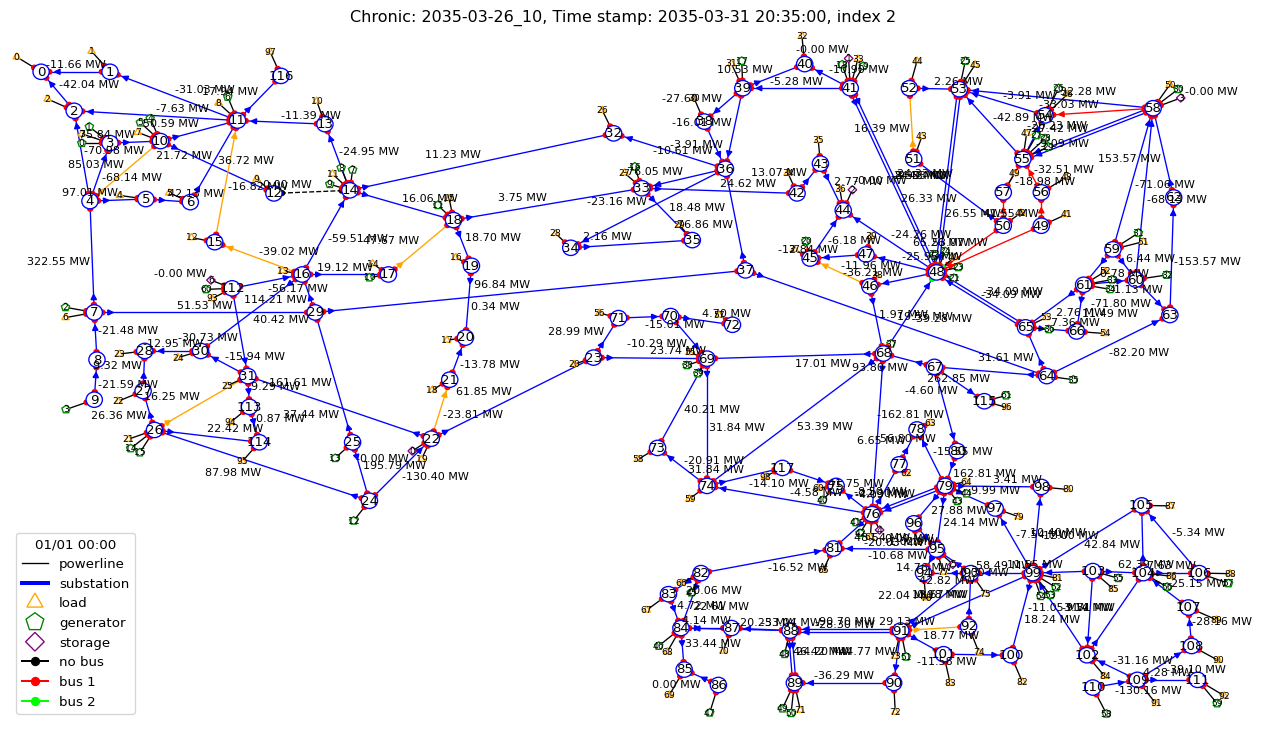

In [ ]:
obs_plotter.visualize_next(line_info="p")

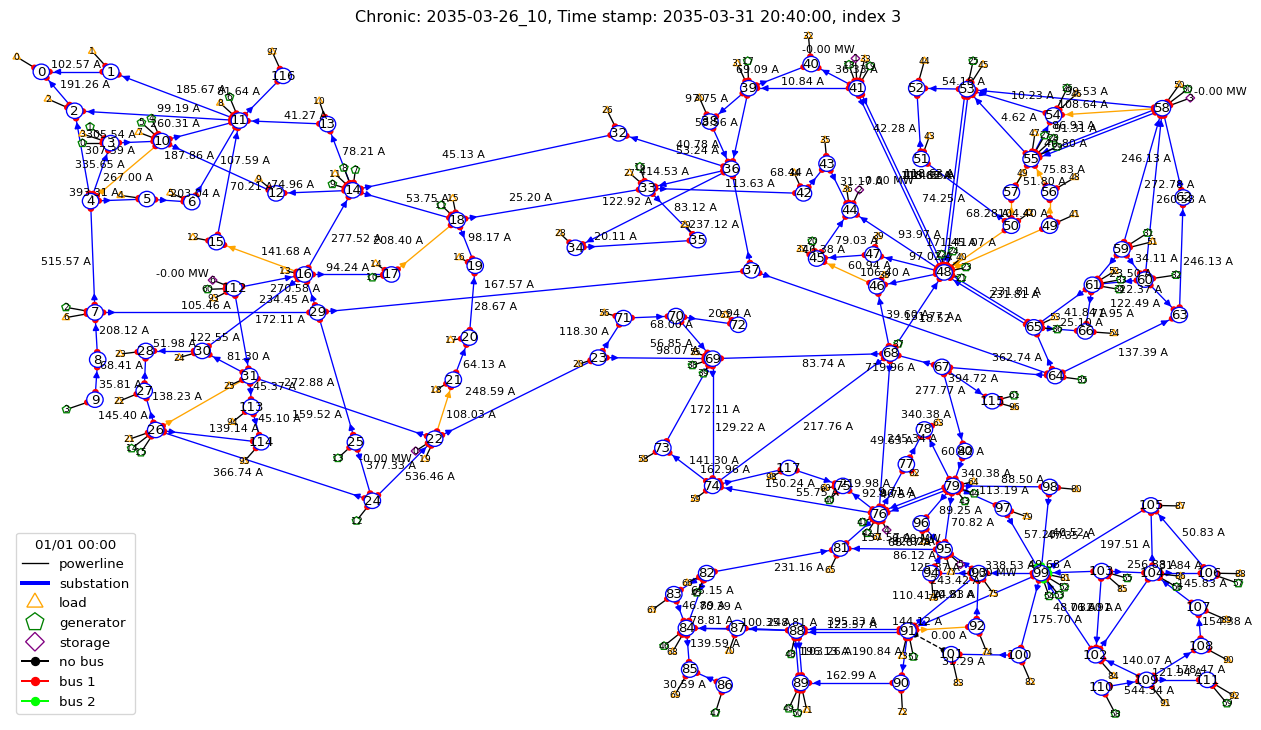

In [ ]:
obs_plotter.visualize_next(line_info="a")